<a href="https://colab.research.google.com/github/offilein/whatsapp_data/blob/master/whatsapp_daten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Regex für '18.04.18, 20:38 -'
def startsWithDateTime(s):
  phoneNumRegex = r'^([0-2][0-9]|(3)[0-1])(\.)(((0)[0-9])|((1)[0-2]))(\.)(\d{2}|\d{4}), ([0-9][0-9]):([0-9][0-9]) -'  #Datum und Uhrzeit
  result = re.match(phoneNumRegex, s)
  if result:
    return True
  return False

In [0]:
#Regex für 'Meo:'
def startsWithAuthor(s):
  patterns = [
      '([\w]+):',                        # Vorname
      '([\w]+[\s]+[\w]+):',              # Vorname + Nachname
      '(.[\w]+[\s]+[\w]+):',             # .Vorname + Nachname
      '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # Vorname + Zweiter Vorname + Nachname
      '([+]\d{2} \d{3} \d{8})'           # Handy Nummer (Europa)
  ]
  pattern = '^' + '|'.join(patterns)
  result = re.match(pattern, s)
  if result:
    return True
  return False

In [0]:
#Nachricht aufteilen
def getDataPoint(line):
    # line = 18.04.18, 20:38 - Meo: LOOOOL
    
    splitLine = line.split(' - ') # splitLine = ['18.04.18, 20:38', 'Meo: LOOOOL']
    
    dateTime = splitLine[0] # dateTime = '18.04.18, 20:38'
    
    date, time = dateTime.split(', ') # date = '18.04.18'; time = '20:38'
    
    message = ' '.join(splitLine[1:]) # message = 'Meo: LOOOOL'
    
    if startsWithAuthor(message): # True (Funktion startsWithAuthor())
        splitMessage = message.split(': ') # splitMessage = ['Meo', 'LOOOOL']
        author = splitMessage[0] # author = 'Meo'
        message = ' '.join(splitMessage[1:]) # message = 'LOOOOL'
    else:
        author = None
    return date, time, author, message

In [0]:

parsedData = [] # Liste für Pandas
conversationPath = './WhatsApp Chat mit Lactovegetarier lvl 3🍫🐰.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Erste Zeile überspringen
        
    messageBuffer = [] # Buffer für mehrzeilige Nachrichten
    date, time, author = None, None, None # Variablen der aktuellen Nachricht
    
    while True:
        line = fp.readline() 
        if not line: # Stop am Ende der Datei
            break
        line = line.strip()
        if startsWithDateTime(line): # Wenn Zeile mit DateTimePattern beginnt ist das eine neue Zeile (Funktion startsWithDateTime())
            if len(messageBuffer) > 0: # Check ob der buffer etwas enthält
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) # parsedData mit dem buffer füllen
            messageBuffer.clear() # buffer leeren
            date, time, author, message = getDataPoint(line) # Nachricht aufteilen (Funktion getDataPoint())
            messageBuffer.append(message) # Nachricht zum buffer hinzufügen
        else:
            messageBuffer.append(line) # Wenn Zeile nicht mit Datum anfängt ist es eine mehrzeile Nachricht, dann zum buffer hinzufügen

df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message'])

In [0]:
df_clean = df.replace(['.kiki königsschluckspecht', '.56er Jengelz', '+49 176 97698782'],['Alex', 'Kevib', 'Flo'])

In [56]:
df_clean.Author.unique()

array(['Meo', 'Tommy', 'Alex', 'Patrick', 'Dima', 'Kevib', 'Flo', 'Niggo',
       None], dtype=object)

In [57]:
df_clean.describe()

,Date,Time,Author,Message
count,41182,41182,41129,41182
unique,612,1347,8,28836
top,24.05.18,12:24,Alex,<Medien ausgeschlossen>
freq,448,81,10620,3807


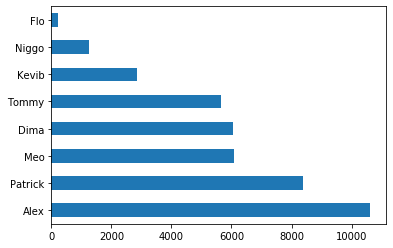

In [66]:
author_value_counts = df_clean['Author'].value_counts() # Anzahl Nachrichten pro Author
author_value_counts.plot.barh() # Plot a bar chart mit Pandas

        Date   Time   Author                  Message
3   18.04.18  20:55    Tommy  <Medien ausgeschlossen>
7   19.04.18  05:39    Tommy  <Medien ausgeschlossen>
11  19.04.18  07:39  Patrick  <Medien ausgeschlossen>
15  19.04.18  08:46     Dima  <Medien ausgeschlossen>
16  19.04.18  09:01     Alex  <Medien ausgeschlossen>


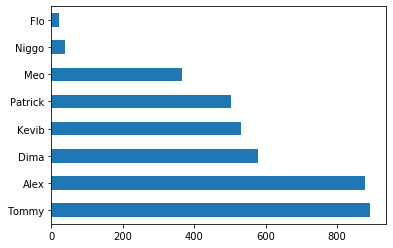

In [64]:
media_messages_df = df_clean[df_clean['Message'] == '<Medien ausgeschlossen>']
print(media_messages_df.head())

author_media_messages_value_counts = media_messages_df['Author'].value_counts()
top_10_author_media_messages_value_counts = author_media_messages_value_counts.head(10)
top_10_author_media_messages_value_counts.plot.barh()

In [65]:
messages_df = df_clean.drop(null_authors_df.index) # Alle Nachrichten mit NULL als Author löschen
messages_df = messages_df.drop(media_messages_df.index) # Alle <Medien ausgeschlossen> Nachrichten löschen
messages_df.head()

,Date,Time,Author,Message
0,18.04.18,20:38,Meo,x)
1,18.04.18,20:40,Meo,Oder man springt aus 200 Metern ins Wasser.. V...
2,18.04.18,20:40,Tommy,Vomg dicke her
4,18.04.18,20:55,Tommy,#dickefinger
5,18.04.18,20:56,Tommy,Russischer Pop empfohlen weil ich Dr. Dre gehö...


In [69]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s)) #Letter Count erstellen
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))) #Word Count erstellen
messages_df.head()

,Date,Time,Author,Message,Letter_Count,Word_Count
0,18.04.18,20:38,Meo,x),2,1
1,18.04.18,20:40,Meo,Oder man springt aus 200 Metern ins Wasser.. V...,71,13
2,18.04.18,20:40,Tommy,Vomg dicke her,14,3
4,18.04.18,20:55,Tommy,#dickefinger,12,1
5,18.04.18,20:56,Tommy,Russischer Pop empfohlen weil ich Dr. Dre gehö...,53,9


In [86]:
#Anzahl versendeter Buchstaben und Wörter
messages_df['Letter_Count'].sum(), messages_df['Word_Count'].sum()

(1049410, 188064)

Text(0, 0.5, 'Authors')

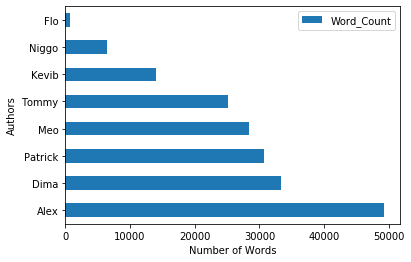

In [88]:
#Anzahl versendeter Wörter pro Author
total_word_count_grouped_by_author = messages_df[['Author', 'Word_Count']].groupby('Author').sum()
sorted_total_word_count_grouped_by_author = total_word_count_grouped_by_author.sort_values('Word_Count', ascending=False)
sorted_total_word_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Words')
plt.ylabel('Authors')

Text(0, 0.5, 'Frequency')

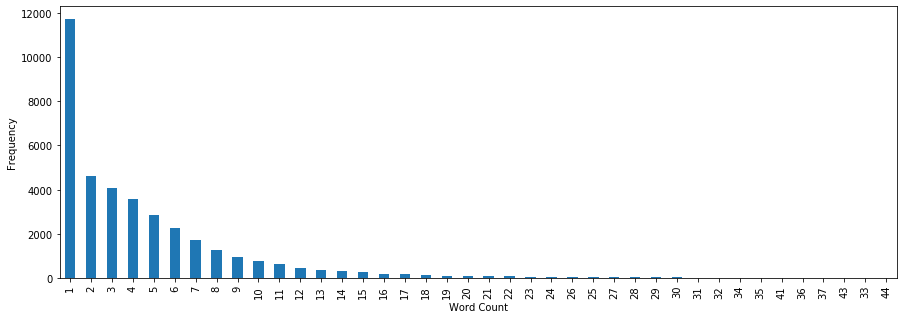

In [92]:
#Häufigste Anzahl von Wörtern in einer Nachricht
plt.figure(figsize=(15, 5)) # To ensure that the bar plot fits in the output cell of a Jupyter notebook
word_count_value_counts = messages_df['Word_Count'].value_counts()
top_40_word_count_value_counts = word_count_value_counts.head(40)
top_40_word_count_value_counts.plot.bar()
plt.xlabel('Word Count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Authors')

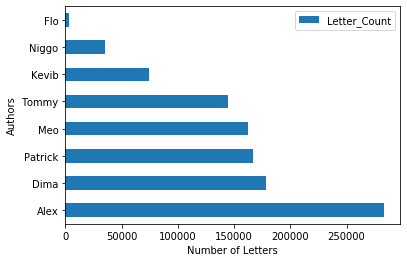

In [93]:
#Anzahl aller versendeten Buchstaben pro Author
total_letter_count_grouped_by_author = messages_df[['Author', 'Letter_Count']].groupby('Author').sum()
sorted_total_letter_count_grouped_by_author = total_letter_count_grouped_by_author.sort_values('Letter_Count', ascending=False)
sorted_total_letter_count_grouped_by_author.plot.barh()
plt.xlabel('Number of Letters')
plt.ylabel('Authors')

Text(0, 0.5, 'Frequency')

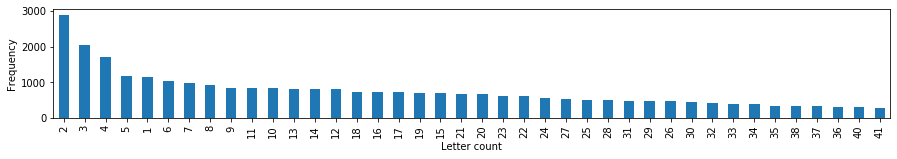

In [94]:
#Häufigste Anzahl von Buchtaben in einer Nachricht
plt.figure(figsize=(15, 2))
letter_count_value_counts = messages_df['Letter_Count'].value_counts()
top_40_letter_count_value_counts = letter_count_value_counts.head(40)
top_40_letter_count_value_counts.plot.bar()
plt.xlabel('Letter count')
plt.ylabel('Frequency')

Text(0, 0.5, 'Date')

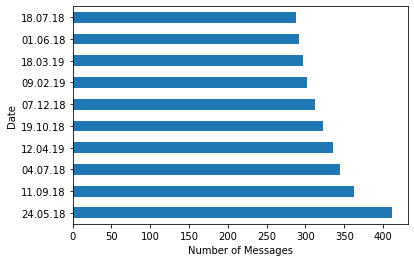

In [95]:
#Top 10 der Tage an denen am meisten Nachrichten versendet wurden
messages_df['Date'].value_counts().head(10).plot.barh() # Top 10 Dates on which the most number of messages were sent
plt.xlabel('Number of Messages')
plt.ylabel('Date')

Text(0, 0.5, 'Time')

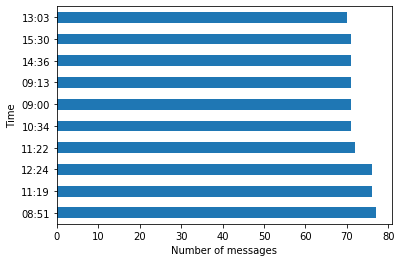

In [96]:
#Zeit zu der die meisten Nachrichten versendet werden
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

Text(0, 0.5, 'Hour of Day')

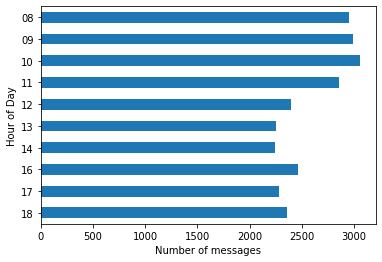

In [98]:
#Zu welcher Stunde des Tages werden die meisten nachrichten versendet
messages_df['Hour'] = messages_df['Time'].apply(lambda x : x.split(':')[0])
messages_df['Hour'].value_counts().head(10).sort_index(ascending=False).plot.barh() # Top 10 Hours of the day during which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')